In [3]:
import pandas as pd

In [5]:
cities = pd.read_csv('weather_by_cities.csv')


In [6]:
cities.head()

day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
4  1/1/2017    mumbai           90          5  Sunny

In [7]:
## Vou agrupar por cidade

g_cities = cities.groupby('city')

g_cities

bem a primeira coisa que acontece é que retornar um objeto do tipo DataFrameGroupBy, contudo como o dataframe ficou organizado depois que foi agrupado por cidade?

   <img src="group_by_cities.png" />
   <br>

Podemos verificar que  cada cidade se tornou um chave tendo como valor uma dataframe. 
Interessante verificar também que é muito semelhante quando usamos o GroupBy pelo SQL.
como por exemplo: SELET * FROM CITIES_DATA GROUP BY CITY

In [9]:
##podemos selecionar um desses grupos da seguinte maneira
g_cities.get_group('paris')

day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy

In [12]:
##podemos iterar sobre cada grupo ao invés de selecionar um específico
##nesse for eu recebo a atribuição da key_city que é a chave e value_df é o objeto dataframe assoiado a essa chave
##como se fosse um dicionário

for key_city, value_df in g_cities:
    print(key_city)
    print(city_df)

mumbai
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy
new york
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


podemos perceber que cada grupo está estruturado conforme foi mostrado anteriormente, agora isso sempre será dessa forma?

In [13]:
##se eu quiser descobrir qual é a temperatura máxima para em cada cidade?

g_cities.max()

day  temperature  windspeed  event
city                                             
mumbai    1/4/2017           92         15  Sunny
new york  1/4/2017           36         12  Sunny
paris     1/4/2017           54         20  Sunny

vamos entender o que aconteceu aqui na sequencia:

<ul>
    <li>quando eu agrupei eu dividi o datrame em um dicionário com chave (coluna que eu agrupei) e as linhas correspondentes a esse grupo</li>
    <li>eu combinei as linhas de cada grupo em uma só, usando uma função, neste exemplo foi a função max</li>
</ul>    

O processo mencionado acima é chamado split apply combine, como mostrado abaixo

<img src='split_apply_combine.png' />

o processo começa com o split que divide os dados em grupos, continua com o apply que aplica funções como max(), min(), mean(), que e a média, e entre outros que irá aplicar essas funções a esses dados e por fim o combine é como esses dados serão combinados em uma única linha por grupo

In [15]:
##posso querer a temperatura do vento média
g_cities.mean()
##será aplicado a média das linhas de cada grupo em cada coluna

temperature  windspeed
city                            
mumbai          88.50       9.25
new york        32.25       8.00
paris           47.75      12.75

In [16]:
##posso também querer toda a estátistica básica
g_cities.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

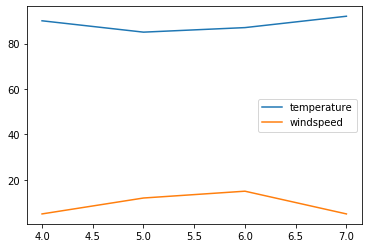

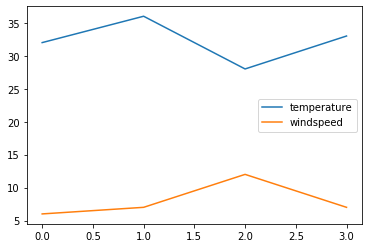

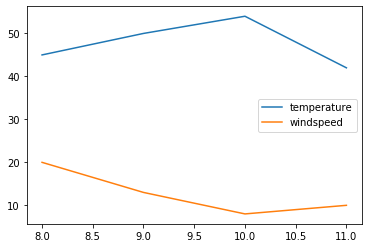

In [18]:
%matplotlib inline 

##imprime matplotlib que está no dataframe
g_cities.plot()

##imprime um gráfico para cada cidade

## Sumário

groupBy, funções agregadas